# 6.2 WH Exploring relationships

### This script contains the following:
#### 1. Importing Visualization Libraries and Data
#### 2. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots
#### 3. Revisiting Questions
#### 4. Defining Hypotheses

## 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
matplotlib.__version__

'3.7.2'

In [3]:
# Ensuring the charts are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Define path

path = r'/Users/giadairene/Documents/CareerFoundry Data Analytics/Data Analytics Immersion/Achievement 6/World_Happiness_Analysis'

In [5]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Happiness_combined_all_years.csv'), index_col = 0)

## 2. Exploring Relationships

### Create a correlation matrix heatmap using seaborn:

In [6]:
df.columns

Index(['Country', 'Region', 'Year', 'Happiness_rank', 'Happiness_score',
       'GDP_capita', 'Social_support', 'Life_expectancy', 'Freedom',
       'Generosity', 'Corruption_perception'],
      dtype='object')

In [7]:
# Create a subset

sub = df[['Happiness_score', 'GDP_capita', 'Social_support', 'Life_expectancy', 'Freedom',
          'Generosity', 'Corruption_perception']]

In [8]:
sub

Happiness_score  GDP_capita  Social_support  Life_expectancy  Freedom  \
0              7.769       1.340           1.587            0.986    0.596   
1              7.600       1.383           1.573            0.996    0.592   
2              7.554       1.488           1.582            1.028    0.603   
3              7.494       1.380           1.624            1.026    0.591   
4              7.488       1.396           1.522            0.999    0.557   
..               ...         ...             ...              ...      ...   
736            3.207       0.531           0.784            0.105    0.375   
737            3.204       0.758           0.881            0.069    0.363   
738            3.138       0.670           0.540            0.092    0.371   
739            2.392       1.417           0.476            0.398    0.123   
740            1.859       0.645           0.000            0.087    0.000   

     Generosity  Corruption_perception  
0         0.153                  0.393  
1         0.252                  0.410  
2         0.271                  0.341  
3         0.354                  0.118  
4         0.322                  0.298  
..          ...                    ...  
736       0.183                  0.068  
737       0.112                  0.117  
738       0.193                  0.051  
739       0.061                  0.027  
740       0.093                  0.059  

[741 rows x 7 columns]

In [9]:
# Create a correlation matrix

sub.corr()

Happiness_score  GDP_capita  Social_support  \
Happiness_score               1.000000    0.687911        0.662872   
GDP_capita                    0.687911    1.000000        0.511341   
Social_support                0.662872    0.511341        1.000000   
Life_expectancy               0.623888    0.417734        0.598337   
Freedom                       0.589159    0.479249        0.316027   
Generosity                    0.038761   -0.217964       -0.010640   
Corruption_perception         0.423645    0.362437        0.156474   

                       Life_expectancy   Freedom  Generosity  \
Happiness_score               0.623888  0.589159    0.038761   
GDP_capita                    0.417734  0.479249   -0.217964   
Social_support                0.598337  0.316027   -0.010640   
Life_expectancy               1.000000  0.190422   -0.007378   
Freedom                       0.190422  1.000000    0.143416   
Generosity                   -0.007378  0.143416    1.000000   
Corruption_perception         0.245826  0.420112    0.169061   

                       Corruption_perception  
Happiness_score                     0.423645  
GDP_capita                          0.362437  
Social_support                      0.156474  
Life_expectancy                     0.245826  
Freedom                             0.420112  
Generosity                          0.169061  
Corruption_perception               1.000000

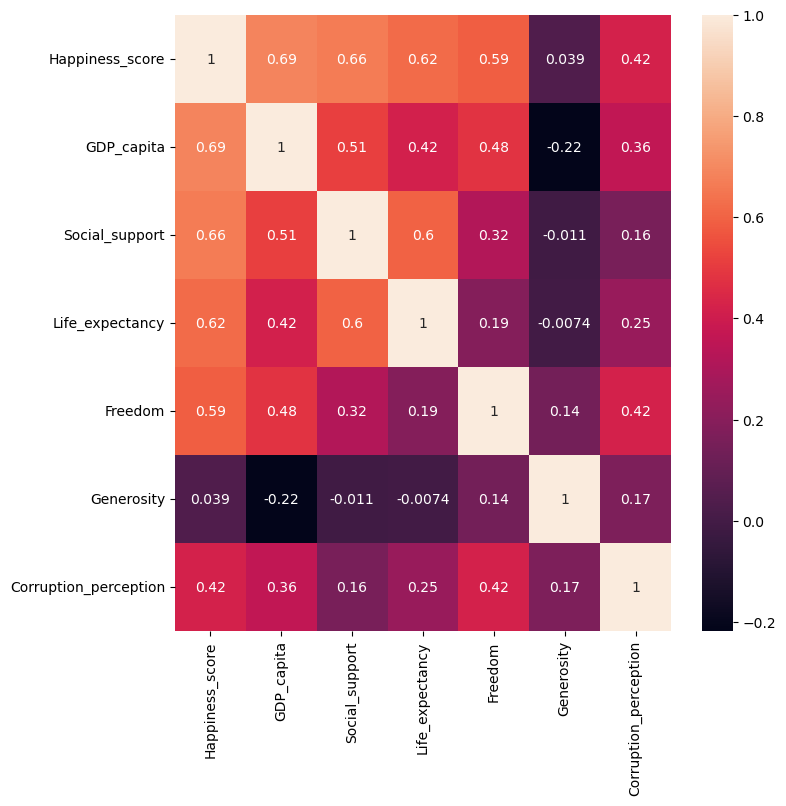

In [10]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(8,8))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

#### What factors have the most impact on a country's happiness score?

Analysing correlation of "Happiness_score"

* With "GDP_capita": a 0.69 coefficient indicates a strong positive correlation, which makes sense - the bigger and better performing the economy of a country, the higher its happiness score.

* With "Social_support": a 0.66 coefficient indicates again a strong positive correlation - the more social support people receive, the highest the happiness score.

* With "Life_expectancy": a 0.62 coefficient indicates that a higher healthy life expectancy at birth equates to a higher happiness score (along with its opposite scenario).

* With "Freedom": a 0.59 coefficient indicates a medium-to-strong positive correlation, which makes sense - the more people are satisfied with their freedom to choose what to do with their lives, the higher the happiness score.

* With "Generosity": a 0.039 coefficient indicates a very weak positive correlation. This could be interpreted as “the more generous the people of a country, the higher its happiness rank”.

* With "Corruption_perception": a 0.42 coefficient indicates a moderate positive correlation - higher perceptions of corruption equate to a higher the happiness score. This correlation seems odd to me, as I would have expected a negative one - the lower corruption perception in a country, the higher its happiness score.

#### Other strong correlations:

* "GDP_capita" with "Social_support" (a 0.51 coefficient indicates a medium-to-strong positive correlation) and "Freedom" (a 0.48 coefficient equates to a moderate positive correlation).
* "Social_support" with "Life_expectancy" has a 0.6 coefficient indicating a strong positive correlation between the two variables.
* "Freedom" with "Corruption_perception" has a 0.42 coefficient equating to a moderate positive correlation.

### Create scatterplots for the variables with the strongest correlations:

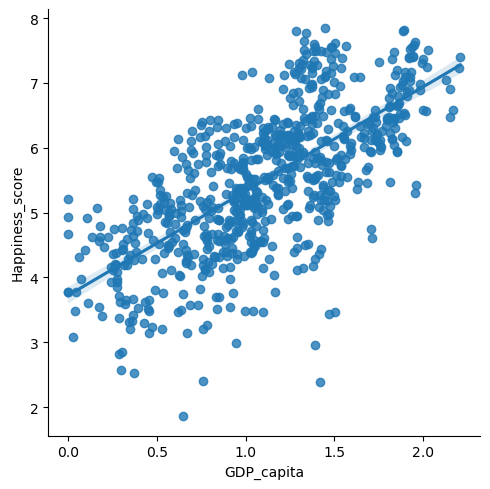

In [11]:
# Create a scatterplot for "Happiness_score" and strongly related factors (coefficient > 0.5)
# Scatterplot for "Happiness_score" and "GDP_capita"

sns.lmplot(x = 'GDP_capita', y = 'Happiness_score', data = df)

**Description:**
In this scatterplot there is a strong positive correlation between "GDP_capita" and "Happiness_score". The trend line has a positive slope, indicating that as the GDP per capita score increases, the happiness score also tends to increase. Data points are clustered around the trend line with a certain degree of variability, indicating a moderate linear relationship.

In [12]:
# Plot the relationship between Happiness_score and GDP_capita (while adding color and size)

fig = px.scatter(df, x = "GDP_capita", y = "Happiness_score", size = 'Happiness_rank', color = "Country", hover_name = "Country")

fig.update_layout(title_text = 'Happiness Score vs GDP per Capita')
fig.show()

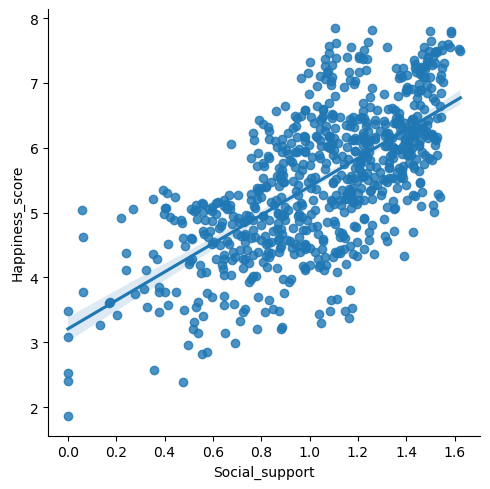

In [13]:
# Scatterplot for "Happiness_score" and "Social_support"

sns.lmplot(x = 'Social_support', y = 'Happiness_score', data = df)

**Description:**
In this scatterplot there is a strong positive correlation between "Social_support" and "Happiness_score". The trend line has a positive slope, indicating that as the social support score increases, the happiness score also tends to increase. Data points are clustered around the trend line with a certain degree of variability, indicating a moderate linear relationship.

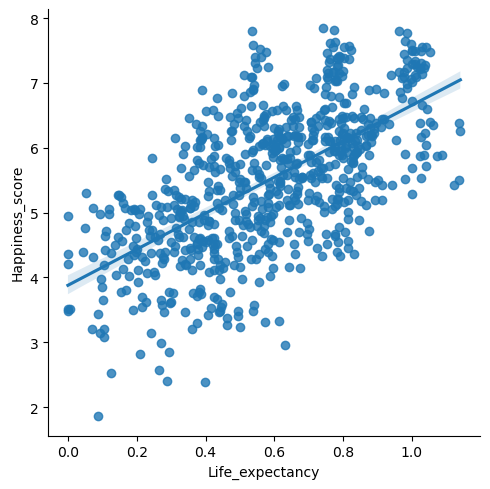

In [14]:
# Scatterplot for "Happiness_score" and "Life_expectancy"

sns.lmplot(x = 'Life_expectancy', y = 'Happiness_score', data = df)

**Description:**
In this scatterplot there is a strong positive correlation between "Life_expectancy" and "Happiness_score". The trend line has a positive slope, indicating that as the healthy life expectancy score increases, the happiness score also tends to increase. Data points are though clustered around the trend line with a great degree of variability, so the relationship between the two variables isn't possibly purely linear. It is possible to notice three distincts upward trends: one when the life expectancy score hits 0.6, then 0.8 and finally 1.0.

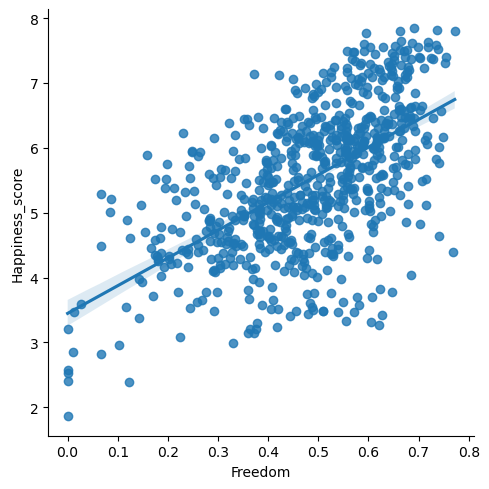

In [15]:
# Scatterplot for "Happiness_score" and "Freedom"

sns.lmplot(x = 'Freedom', y = 'Happiness_score', data = df)

**Description:** In this scatterplot there is a strong positive correlation between "Freedom" and "Happiness_score". The trend line has a positive slope, indicating that as the freedom score increases, the happiness score also tends to increase. Data points are though clustered around the trend line with a great degree of variability, so the relationship between the two variables isn't possibly purely linear.

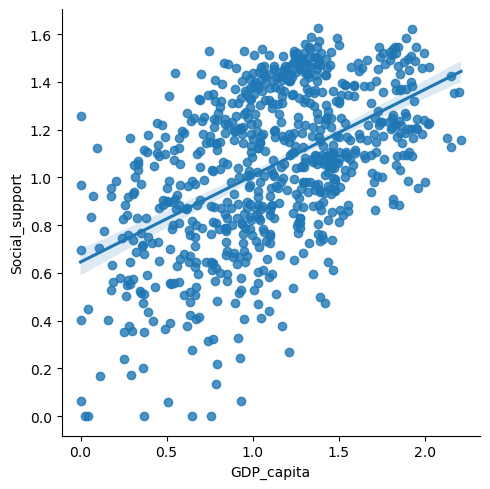

In [16]:
# Scatterplot for "GDP_capita" and "Social_support"

sns.lmplot(x = 'GDP_capita', y = 'Social_support', data = df)

**Description:** In this scatterplot there is a strong positive correlation between "GDP_capita" and "Social_support". The trend line has a positive slope, indicating that as the GDP per capita score increases, the social support score tends to do the same. Data points are clustered around the trend line quite closely with a certain degree of variability, except for some outliers in the range 0.0 < GDP_capita < 1.5.

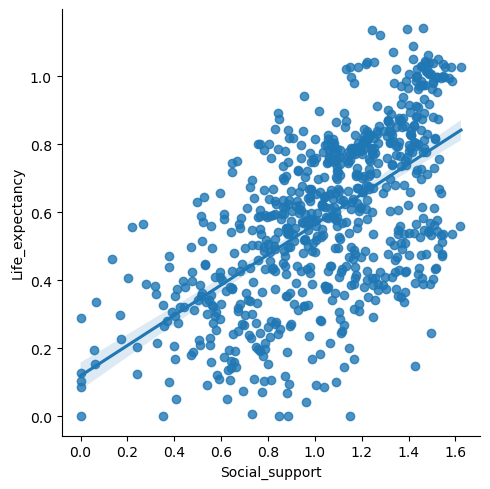

In [17]:
# Scatterplot for "" and "Social_support"

sns.lmplot(x = 'Social_support', y = 'Life_expectancy', data = df)

**Description:** In this scatterplot there is a strong positive correlation between "Social_support" and "Life_expectancy". The trend line has a positive slope, indicating that as the social support score increases, the life expectancy score tends to do the same. Data points are clustered around the trend line with a great degree of variability, so the relationship between the two variables isn't possibly purely linear.

### Create a pair plot of the dataset:

In [18]:
# # Select the relevant columns for the pair plot

sub_pair = df[['Happiness_score', 'GDP_capita', 'Social_support', 'Life_expectancy', 'Freedom',
          'Generosity', 'Corruption_perception']]

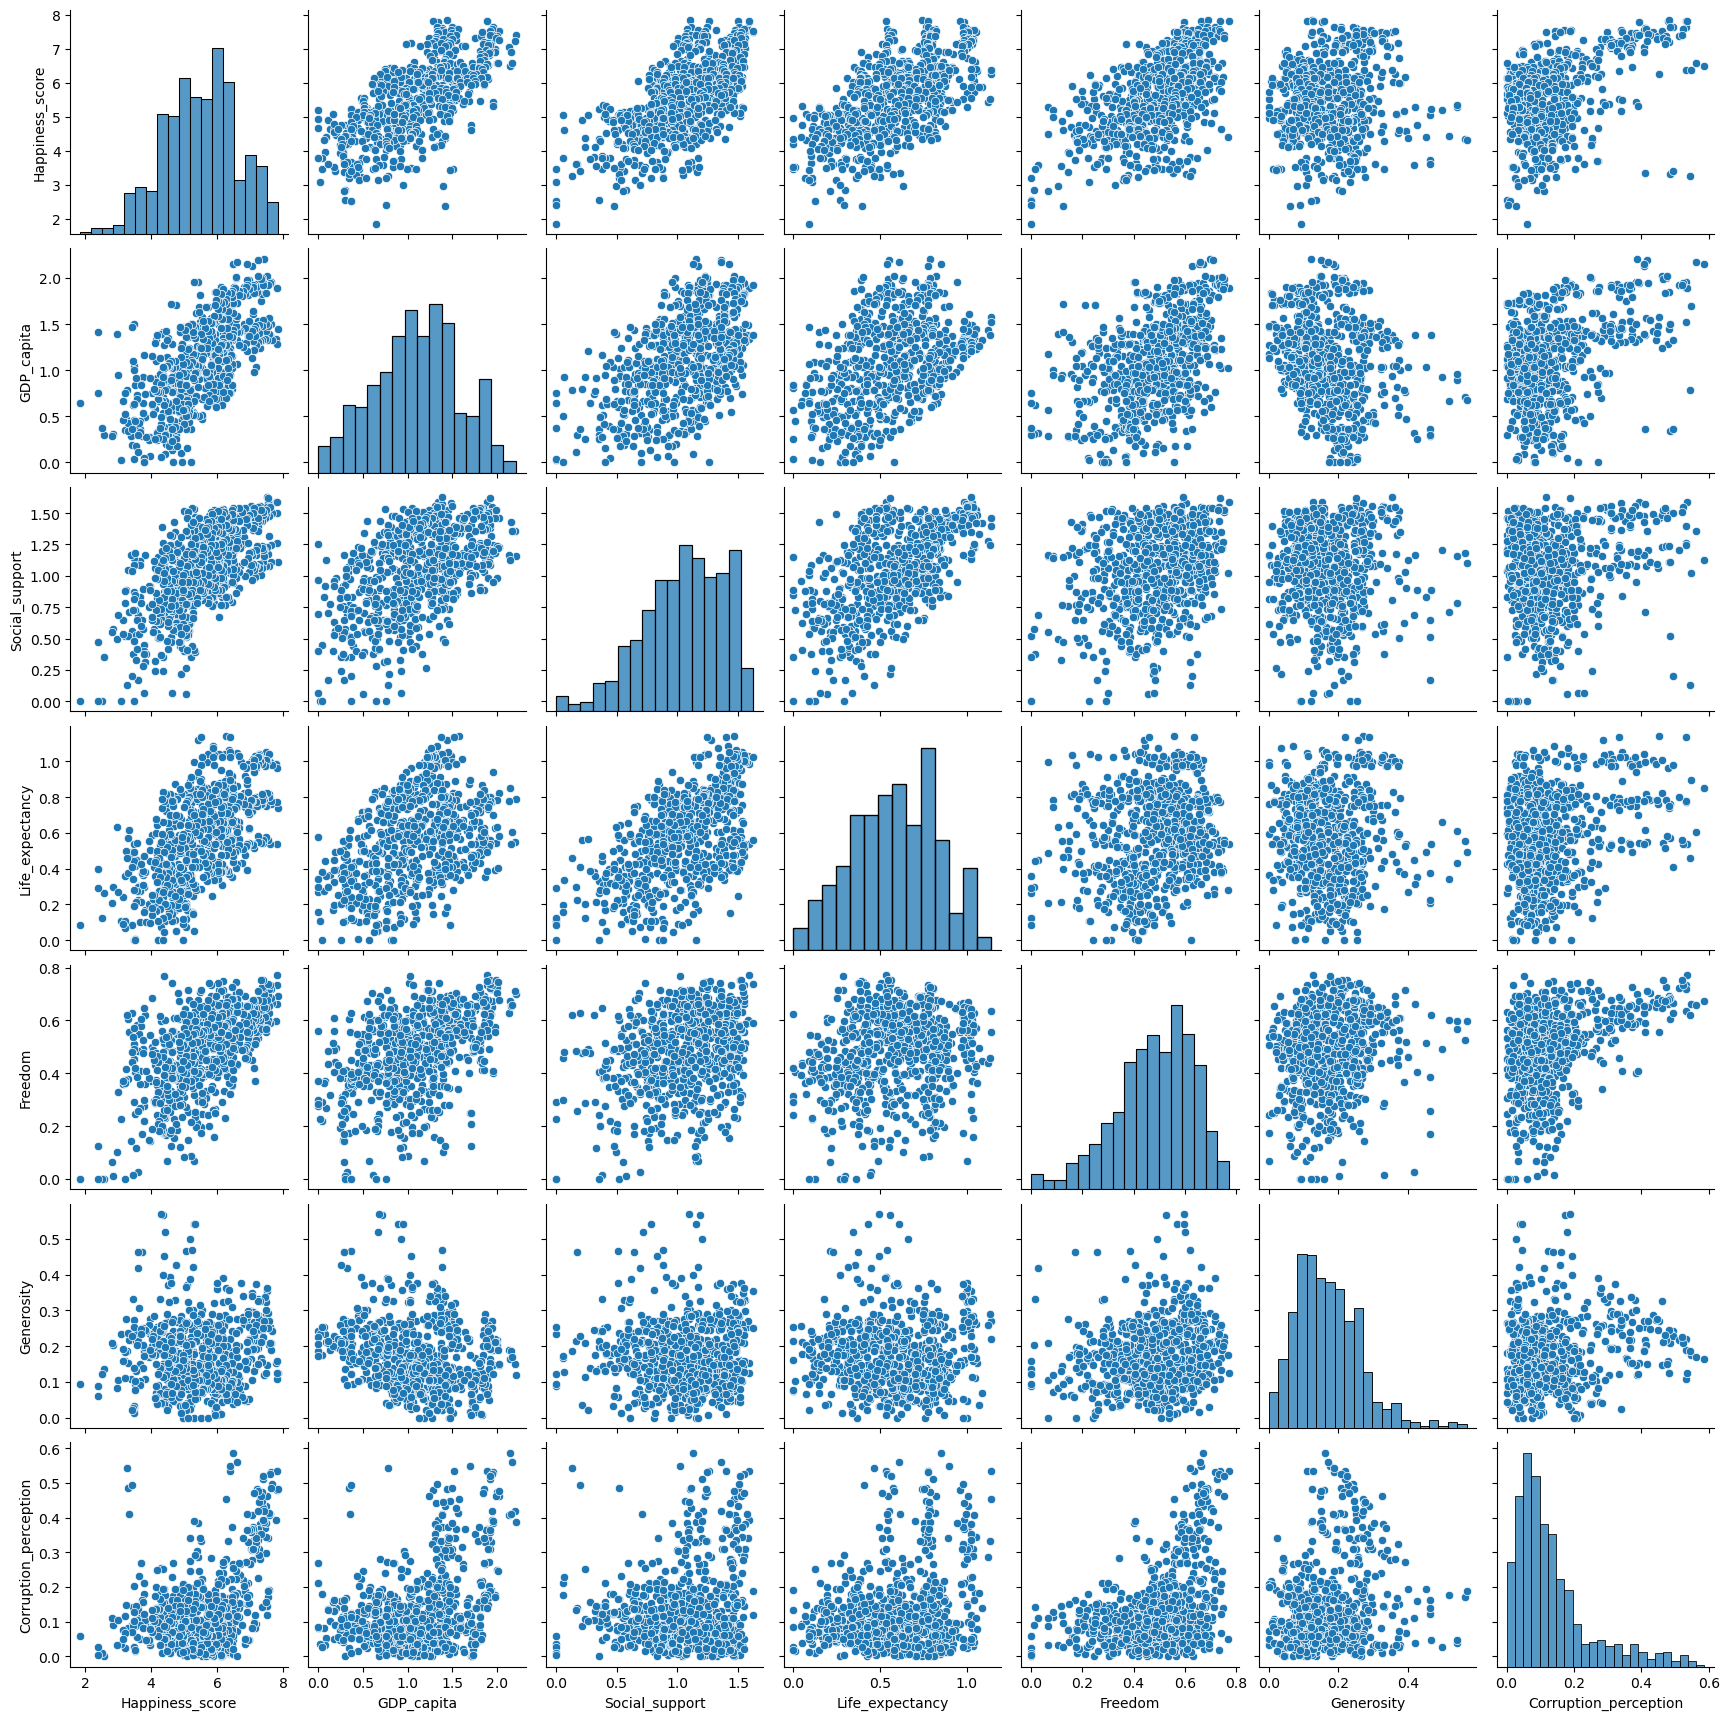

In [19]:
# Create the pair plot

pair_plot = sns.pairplot(sub_pair)

#### Commenting on the distribution of variables:

* The histogram for **Happiness_score** is somewhat symmetric but slightly right-skewed, indicating a few countries with very high happiness scores.
* **GDP_capita** shows a slightly right-skewed distribution, suggesting that while most countries have moderate GDP per capita, a few have very high values.
* The histogram for **Social_support** shows a slightly left-skewed distribution, indicating that most countries have high levels of social support.
* **Life_expectancy** appears to be normally distributed, with most countries having moderate to high healthy life expectancies at birth.
* The histogram for **Freedom** is somewhat uniform but slightly left-skewed, indicating varied levels of perceived freedom across countries.
* **Generosity** has a right-skewed distribution, with most countries having lower generosity scores, and a few having significantly higher scores.
* **Corruption_perception**'s distribution is heavily right-skewed, indicating that in most countries, corruption is perceived to be low.

#### Variables to explore further:

* **GDP_capita and Happiness_score:**  investigating this further can reveal the extent to which economic prosperity influences overall happiness.
* **Social_support and Happiness_score:** a strong positive correlation is visible, highlighting the importance of community and support networks in fostering well-being. This relationship is worth exploring to understand its impact.
* **Life_expectancy and Happiness_score:** exploring this further can help understand how health and longevity contribute to overall happiness.
* **Freedom and Happiness_score:** analyzing this relationship can provide insights into how freedom of choice and personal autonomy affect happiness.
* **Generosity and Happiness_score:** the very weak positive correlation suggests that generosity has a minimal impact on happiness scores. This could indicate that while being generous may contribute to happiness, its effect is much smaller compared to other factors.
* **Corruption_perception and Happiness_score:** the positive correlation is unexpected and warrants a deeper investigation to understand why higher perceptions of corruption are associated with higher happiness scores in some cases.
* **GDP_capita and Social_support:** understanding the interaction between economic prosperity and social support can provide a more comprehensive picture of what drives happiness in different contexts.
* **GDP_capita and Freedom:** the moderate positive correlation suggests that countries with higher GDP per capita also tend to have higher levels of perceived freedom. This may reflect the broader opportunities and choices available in wealthier nations.
* **Freedom and Corruption_perception:** the moderate positive correlation suggests that countries with higher levels of perceived freedom also tend to have higher perceptions of corruption. This could indicate that in some contexts, increased transparency and freedom lead to greater awareness of corruption issues.

### Create a categorical plot and interpret the results:

#### Creating a categorical variable that splits the "Happiness_score" column into categories

<Axes: xlabel='Happiness_score', ylabel='Count'>

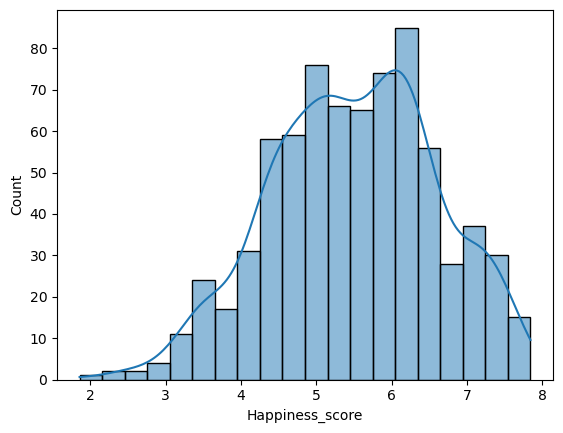

In [20]:
# Use a histogram to visualize the distribution of the 'Happiness_score' variable. 
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df['Happiness_score'], bins = 20, kde = True)

In [21]:
df.loc[df['Happiness_score'] < 4, 'Happiness category'] = 'Not happy'

In [22]:
df.loc[(df['Happiness_score'] >= 4) & (df['Happiness_score'] < 6.5), 'Happiness category'] = 'Medium happy'

In [23]:
df.loc[df['Happiness_score'] >= 6.5, 'Happiness category'] = 'Very happy'

In [24]:
df['Happiness category'].value_counts(dropna = False)

Happiness category
Medium happy    552
Very happy      125
Not happy        64
Name: count, dtype: int64

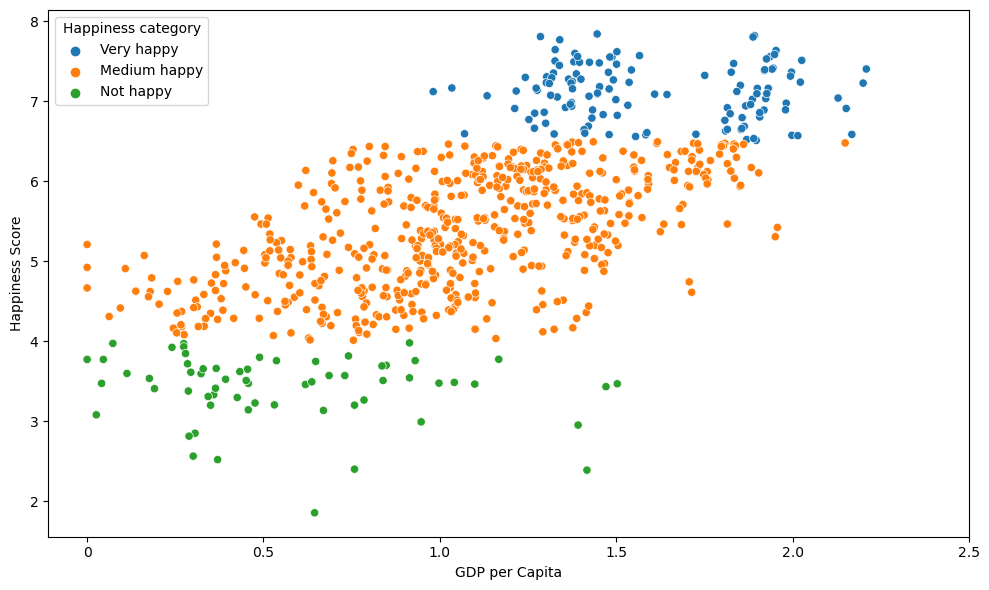

In [25]:
# Create a categorical plot in seaborn using the happiness categories created above

plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=df, x='GDP_capita', y='Happiness_score', hue='Happiness category')

# Set x-axis ticks and labels

xticks = [0, 0.5, 1.0, 1.5, 2.0, 2.5]
ax.set_xticks(xticks)
ax.set_xticklabels(['0', '0.5', '1.0', '1.5', '2.0', '2.5'])
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Happiness Score')

plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

#### Categorical Plot Interpretation:

The plot clearly shows a positive correlation between **GDP per capita** and **Happiness score**. As GDP per capita increases, the happiness score generally increases. This is consistent with the correlation coefficient of 0.69 mentioned earlier.

* **Not happy - green dots:** these countries are primarily clustered at the lower end of the GDP per capita axis (mostly below 0.5) and have lower happiness scores (below 4). This suggests that countries with lower economic output tend to be less happy.
* **Medium happy - orange dots:** these countries are distributed across a wider range of GDP per capita values (up to around 1.5) and happiness scores (ranging from 4 to 6.5). This category shows more variability, indicating that factors other than GDP per capita also influence happiness.
* **Very happy - blue dots:** these countries are predominantly found in the higher range of GDP per capita (above 1.5) and have higher happiness scores (above 6.5). This suggests that higher economic output is strongly associated with higher happiness levels.

#### Outliers Interpretation:

* **High GDP, Low Happiness:** there are a few points (orange and green dots) in the higher GDP per capita range (>1.5) with relatively low happiness scores (below 5). These countries might face other issues that affect happiness despite having strong economies.
* **Variability at Mid GDP Levels:** at mid GDP per capita levels (0.5 to 1.5), there is considerable variability in happiness scores ranging from low (orange and green dots) to high (blue dots). This suggests that at mid-levels of economic development, other factors such as social support, freedom, and life expectancy play a critical role in determining happiness.

### Revisiting the plot with outliers in mind:

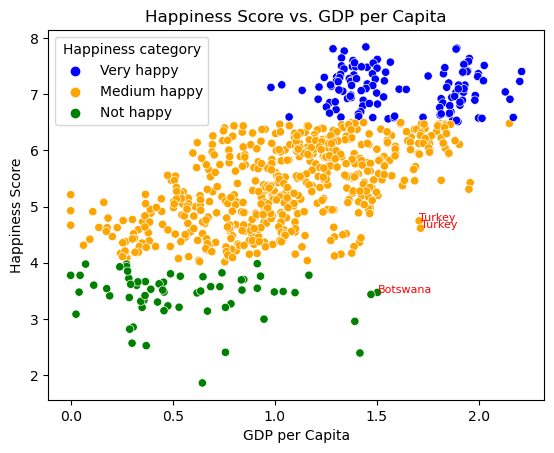

In [26]:
# Create a scatter plot with GDP per Capita and Happiness Score

sns.scatterplot(data=df, x='GDP_capita', y='Happiness_score', hue='Happiness category', palette={'Not happy': 'green', 'Medium happy': 'orange', 'Very happy': 'blue'})

# Highlight outliers

for i, row in df.iterrows():
    if row['GDP_capita'] > 1.5 and row['Happiness_score'] < 5:
        plt.text(row['GDP_capita'], row['Happiness_score'], row['Country'], fontsize=8, color='red')
    if row['GDP_capita'] < 0.5 and row['Happiness_score'] > 6.5:
        plt.text(row['GDP_capita'], row['Happiness_score'], row['Country'], fontsize=8, color='red')

plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('Happiness Score vs. GDP per Capita')
plt.show()

## 3. Revisiting Questions:

### 1. Is there a correlation between GDP per capita and happiness scores?
Yes, there is a strong positive correlation between GDP per capita and happiness scores, with a coefficient of 0.69. This indicates that countries with higher GDP per capita tend to have higher happiness scores.

### 2. How does social support correlate to happiness scores?
Social support shows a strong positive correlation with happiness scores, with a coefficient of 0.66. This suggests that higher levels of social support are associated with higher happiness scores.

### 3. What are the differences in average life expectancy between the happiest and least happy countries?
Countries with high happiness scores (typically above 6) generally have high life expectancy values (typically above 0.7). This suggests that in the happiest countries, people tend to live longer and healthier lives. Conversely, countries with lower happiness scores (typically below 4) have lower life expectancy values (often below 0.5). This indicates that in the least happy countries, people tend to have shorter and less healthy lives.

### 4. What is the relationship between a country's level of freedom and its happiness score?
There is a medium-to-strong positive correlation between freedom and happiness scores, with a coefficient of 0.59. Countries where individuals feel more freedom to make life choices tend to report higher happiness scores.

### 5. How does the degree of generosity in a country relate to its happiness score?
The correlation between generosity and happiness scores is very weak, with a coefficient of 0.039. This suggests that while generosity might contribute to happiness, its impact is relatively minor compared to other factors.

### 6. Is there a correlation between the level of corruption perception and happiness score?
Surprisingly, there is a moderate positive correlation (0.42) between perceived corruption and happiness scores. This unexpected result suggests that countries with higher perceptions of corruption report higher happiness scores, which could be due to specific socio-cultural contexts or reporting biases that require further investigation.

### 7. Are there any outliers or anomalies in the data that require further investigation?
Yes, outliers include countries with high GDP but low happiness scores, and those with low GDP but high happiness scores. These anomalies suggest that other factors such as social support, freedom, and life expectancy play a critical role in determining happiness and merit further investigation.

### New arisen questions: 8. What factors contribute to the outliers with low happiness scores despite high GDP per capita or vice versa? Are there specific political, economic, or social circumstances in these countries that explain these anomalies?

### 9. How have GDP per capita and happiness scores changed over the years for specific countries or regions? Are there noticeable trends or shifts?

### 10. How do other factors - like social support and freedom - affect the relationship between GDP per capita and happiness scores?

### 11. Why does a higher perception of corruption appear to have a moderate positive correlation with happiness scores, contrary to the expectation that lower corruption would equate to higher happiness?

### 12. How does the relationship between corruption perception and happiness scores vary across different regions? Are there regions where the perception of corruption has a stronger negative impact on happiness scores compared to others? 

### 13. How does the level of freedom influence the corruption perception in a country?

## 4. Defining Hypotheses:

*  **Countries with higher GDP per capita tend to have higher happiness scores.**
* **Higher levels of social support are associated with higher happiness scores.**
* **Countries with higher life expectancy have higher happiness scores.**
* **Greater perceived freedom in a country corresponds to higher happiness scores.**
* **A higher level of generosity doesn't influence happiness scores.**
* **Countries with higher perceptions of corruption report higher happiness scores.**
* **The relationship between key variables (e.g., GDP per capita, social support, life expectancy) and happiness scores varies significantly across different regions.**